## (Final Project) H2H10706K_SANSKAR

#### 1. Use the PRS dataset to create a dataframe

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from matplotlib import pyplot as plt
from numpy.lib.histograms import histogram
import requests
import bs4
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Final.csv')

#### 2. Dataframe Description

In [3]:
df.describe

<bound method NDFrame.describe of          CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Regi

#### 3. Dataframe shape

In [4]:
df.shape

(1101925, 16)

In [5]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER'],
      dtype='object')

#### 4. Dataframe information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [7]:
df['ORDER_CREATION_DATE'].info

<bound method Series.info of 0          20220101
1          20220101
2          20220101
3          20220101
4          20220101
             ...   
1101920    20220601
1101921    20220601
1101922    20220601
1101923    20220601
1101924    20220601
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: int64>

In [8]:
df['REQUESTED_DELIVERY_DATE'].info

<bound method Series.info of 0          20220113
1          20220111
2          20220112
3          20220106
4          20220106
             ...   
1101920    20220601
1101921    20220601
1101922    20220601
1101923    20220601
1101924    20220601
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: int64>

#### 5. Check for the Null values in the dataframe

In [9]:
df.describe(include='object')

,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,CREDIT_CONTROL_AREA,ORDER_AMOUNT,ORDER_CURRENCY
count,1101925,1101925,1101925,1083233,1101925,1101925,1101925
unique,243,2,47904,350,8,235152,20
top,Congo,North-Region,"0,00",X000,SR04,"0,00",USD
freq,8985,586052,1025068,347810,138594,249096,643185


In [10]:
df.isnull()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101921,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101922,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101923,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [11]:
df['ORDER_AMOUNT'].isnull().values.any()

False

In [12]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [13]:
df.isnull().sum().sum()

901139

#### 6. Replace all the null values with "NaN"

In [14]:
df.replace(to_replace=[], value="NaN", inplace=True)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


#### 7. Convert format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"


In [15]:
df['ORDER_CREATION_DATE']=pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')

In [16]:
#df['a'] = pd.to_datetime(df['a'], format='%Y-%m-%d')
df['ORDER_CREATION_DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1101925 entries, 0 to 1101924
Series name: ORDER_CREATION_DATE
Non-Null Count    Dtype         
--------------    -----         
1101925 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.4 MB


In [17]:
df['ORDER_CREATION_DATE'].describe

<bound method NDFrame.describe of 0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]>

#### 8. Convert "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"


In [18]:
df['REQUESTED_DELIVERY_DATE']=pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


#### 9. Sanity check: Count records where Order date > Delivery date

In [19]:
#df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])
#df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])
# Perform the sanity check
sanity_check_count = len(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']])
# Display the count of records where order date > delivery date
print("No of records with order date > delivery date:", sanity_check_count)

No of records with order date > delivery date: 27142


In [20]:
df1 = df[df['REQUESTED_DELIVERY_DATE']<df['ORDER_CREATION_DATE']]
df1

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,2022-01-02,73006,NR03,795887697,"0,00",2021-12-31,RON,93.0,1210109233
366,824655599,4346,Azerbaijan,North-Region,"88,24",9999,59,2022-01-03,83005,NR02,976505690,"0,00",2021-12-29,RON,93.0,1210109233
583,911886357,4078,Mayotte,North-Region,"2112,64",9999,59,2022-01-03,113004,NR03,906169691,"0,00",2021-12-31,RON,93.0,1210109233
585,970279857,2868,Taiwan,North-Region,"1697,55",9999,59,2022-01-03,113212,SR04,954171827,"0,00",2021-12-31,RON,93.0,1210109233
588,868088697,3564,New Zealand,North-Region,"4734,95",9999,59,2022-01-03,113255,NR01,866142380,"0,00",2021-12-31,RON,93.0,1210109233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101750,832828339,4390,Greenland,North-Region,"0,00",9999,3000,2022-06-01,53614,NR01,897942526,"645,18",2022-05-31,AUD,64.0,1210417298
1101751,857097217,3216,Antarctica (the territory South of 60 deg S),North-Region,"0,00",9999,3000,2022-06-01,53640,NR04,917261980,"1495,71",2022-05-31,AUD,64.0,1210417298
1101781,834722188,3797,Albania,North-Region,"0,00",9999,3000,2022-06-01,60014,SR03,773583018,"2014,44",2022-05-31,AUD,64.0,1210417298
1101783,905569544,4391,Nicaragua,North-Region,"0,00",9999,3000,2022-06-01,60129,SR01,879740718,"816,96",2022-05-31,AUD,64.0,1210417298


#### 10. Remove those records where order date is greater than the delivery date 

In [21]:
# for x in df.index:
#   if df.loc[x, "Duration"] > 120:
#     df.drop(x, inplace = True)
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index, inplace = True)
df


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


#### 11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [22]:
hyphen_check_count = len(df[df['ORDER_AMOUNT'].str.contains('-', na=False)])
print("No of records with order date having '-':", hyphen_check_count)

No of records with order date having '-': 32


#### 12. Replace “-” with “” from the “ORDER_AMOUNT” field

In [23]:
df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace('-','')

In [24]:
#Check if hyphen is removed or not
hyphen_check_count = len(df[df['ORDER_AMOUNT'].str.contains('-', na=False)])
print("No of records with order date having '-':", hyphen_check_count)

No of records with order date having '-': 0


#### 13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..


In [25]:
comma_check_count = len(df[df['ORDER_AMOUNT'].str.contains(',', na=False)])
print("No of records with order date having '-':", comma_check_count)

No of records with order date having '-': 1073406


#### 14. Replace “,” with “.” from the “ORDER_AMOUNT” field.

In [26]:
df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace(',','.')

In [27]:
comma_check_count = len(df[df['ORDER_AMOUNT'].str.contains(',', na=False)])
print("No of records with order date having '-':", comma_check_count)

No of records with order date having '-': 0


In [28]:
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,2022-01-01,160023,NR04,787347798,1065.33,2022-01-07,EUR,64.0,1210124309
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,2022-01-02,110022,NR04,884689948,302.85,2022-01-06,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,2022-01-02,130024,NR02,814096053,8380.69,2022-01-06,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,2022-01-02,133014,NR03,901859762,545.85,2022-01-07,EUR,64.0,1210183107
10,806322513,3396,Serbia,South-Region,"660,48",N241,3290,2022-01-02,133014,NR04,770447645,545.85,2022-01-07,EUR,93.0,1210499770


#### 15. Count the number of records where the order date and the delivery date are same

In [29]:
# Perform the equality check
equality_check_count = len(df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']])
# Display the count of records where order date == delivery date
print("No of records with order date > delivery date:", equality_check_count)

No of records with order date > delivery date: 100437


In [30]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER'],
      dtype='object')

#### 16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [31]:
df['ORDER_CURRENCY'].describe

<bound method NDFrame.describe of 0          EUR
1          EUR
2          EUR
3          EUR
4          EUR
          ... 
1101920    SGD
1101921    SGD
1101922    SGD
1101923    SGD
1101924    SGD
Name: ORDER_CURRENCY, Length: 1074783, dtype: object>

In [32]:
boxes={'ORDER_CURRENCY':df['ORDER_CURRENCY']}
df_count = pd.DataFrame(boxes, columns= ['ORDER_CURRENCY'])

count_currency = df_count.pivot_table(columns=['ORDER_CURRENCY'], aggfunc='size')
print (count_currency)

ORDER_CURRENCY
AED      7852
AUD     64200
BHD        32
CAD     55065
CHF      5259
CZK      2178
EUR    253196
GBP     22028
HKD      6198
HU1      1377
KWD         7
MYR     13946
NZD        79
PLN     11861
QAR        12
RON      4731
SAR        14
SEK         4
SGD      3909
USD    622835
dtype: int64


#### 17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column.

In [33]:
import requests
from bs4 import BeautifulSoup
import time

def convert_currency(amount, currency):
    if currency == 'USD':
        return amount
    else:
        url = 'https://www.google.com/search?q={}+{}+to+usd'.format(amount, currency)
        response = requests.get(url)
        time.sleep(2)  # Wait for 2 seconds before parsing the response
        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find('div', attrs={'class':'BNeawe iBp4i AP7Wnd'}).text
        result = result.split(' ')[0]
        return result

In [34]:
df['ORDER_CURRENCY'] = df['ORDER_CURRENCY'].str.replace('HU1', 'HUI')

In [35]:
symbols = [x for x in df['ORDER_CURRENCY'].unique()]

dic = {}
for symbol in symbols:
    try:
        dic[symbol] = convert_currency('1', symbol)
    except:
        print(symbol)

In [36]:
print(symbols)

['EUR', 'AED', 'CHF', 'CZK', 'GBP', 'RON', 'USD', 'PLN', 'HUI', 'SAR', 'BHD', 'KWD', 'QAR', 'SEK', 'CAD', 'HKD', 'AUD', 'MYR', 'SGD', 'NZD']


In [37]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER'],
      dtype='object')

In [38]:
df['amount_in_usd'] = df.apply(lambda x: float(x['ORDER_AMOUNT']) * float(dic[x['ORDER_CURRENCY']]), axis=1)

#### 18. Check for values “0” in the “'amount_in_usd” column.

In [39]:
df['amount_in_usd'].describe

<bound method NDFrame.describe of 0           1021.4327
1            842.4752
2          72218.0022
3           1503.9278
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: amount_in_usd, Length: 1074783, dtype: float64>

In [40]:
df[df['amount_in_usd'] == 0].shape[0]
# values= df[df['amount_in_usd'] == '0.0000']
# len(values)

237821

#### 19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [41]:
df['uniue_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

In [42]:
df.describe

<bound method NDFrame.describe of          CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Regi

#### 1. Create a Histogram on DISTRIBUTION_CHANNEL

In [43]:
df['DISTRIBUTION_CHANNEL'].describe

<bound method NDFrame.describe of 0          United States of America
1                        Martinique
2                           Moldova
3              United Arab Emirates
4                            Greece
                     ...           
1101920                     Germany
1101921                     Armenia
1101922                       Nepal
1101923                      Panama
1101924                   Nicaragua
Name: DISTRIBUTION_CHANNEL, Length: 1074783, dtype: object>

In [44]:
boxes_reg={'DISTRIBUTION_CHANNEL':df['DISTRIBUTION_CHANNEL']}
df_count_reg = pd.DataFrame(boxes_reg, columns= ['DISTRIBUTION_CHANNEL'])
df_count_reg['Frequency'] = df_count_reg['DISTRIBUTION_CHANNEL'].map(df_count_reg['DISTRIBUTION_CHANNEL'].value_counts())

count_reg = df_count_reg.pivot_table(index=['DISTRIBUTION_CHANNEL'], aggfunc='size')
print (count_reg)

DISTRIBUTION_CHANNEL
Afghanistan          4323
Albania              4421
Algeria              4397
American Samoa       4510
Andorra              4485
                     ... 
Wallis and Futuna    4303
Western Sahara       4335
Yemen                4367
Zambia               4420
Zimbabwe             4424
Length: 243, dtype: int64


In [45]:
count_reg = df_count_reg.groupby('DISTRIBUTION_CHANNEL').size().reset_index(name='Frequency')
df_unique = df[['DISTRIBUTION_CHANNEL']].drop_duplicates()

df_combined = pd.merge(df_unique, count_reg, on='DISTRIBUTION_CHANNEL')

print(df_combined)


         DISTRIBUTION_CHANNEL  Frequency
0    United States of America       4416
1                  Martinique       4269
2                     Moldova       4373
3        United Arab Emirates       4319
4                      Greece       4312
..                        ...        ...
238                  Dominica       4358
239                   Albania       4421
240           Solomon Islands       4458
241                     Palau       4378
242               Isle of Man       4363

[243 rows x 2 columns]


In [46]:
regions = [x for x in df['DISTRIBUTION_CHANNEL'].unique()]

dic = {}
for region in regions:
    try:
        dic[region] = convert_region('1', region)
    except:
        print(region)

United States of America
Martinique
Moldova
United Arab Emirates
Greece
Argentina
Armenia
United States Minor Outlying Islands
Serbia
Turks and Caicos Islands
Kiribati
Equatorial Guinea
Mayotte
Bhutan
Brazil
Greenland
Saint Martin
Chad
Tajikistan
Holy See (Vatican City State)
Hungary
Jersey
Korea
Uzbekistan
Haiti
Maldives
Liberia
Lesotho
Djibouti
Bahrain
Cayman Islands
New Caledonia
Iraq
American Samoa
Libyan Arab Jamahiriya
Poland
Belize
Guinea
Burundi
Cote d'Ivoire
Norway
Reunion
France
Pitcairn Islands
Northern Mariana Islands
Algeria
Finland
Iceland
Thailand
Benin
Georgia
Niue
Nauru
Uganda
Ghana
Guinea-Bissau
Netherlands
Switzerland
Bolivia
Montserrat
Gibraltar
Central African Republic
Faroe Islands
Singapore
Guyana
Jordan
Czech Republic
Mali
Cameroon
Namibia
Sudan
Gambia
Morocco
Antigua and Barbuda
Papua New Guinea
Lithuania
Colombia
Vanuatu
New Zealand
French Guiana
Zimbabwe
India
Japan
Sri Lanka
Ukraine
Peru
Guam
Comoros
Niger
Saint Kitts and Nevis
Paraguay
Belgium
Vietnam
Denma

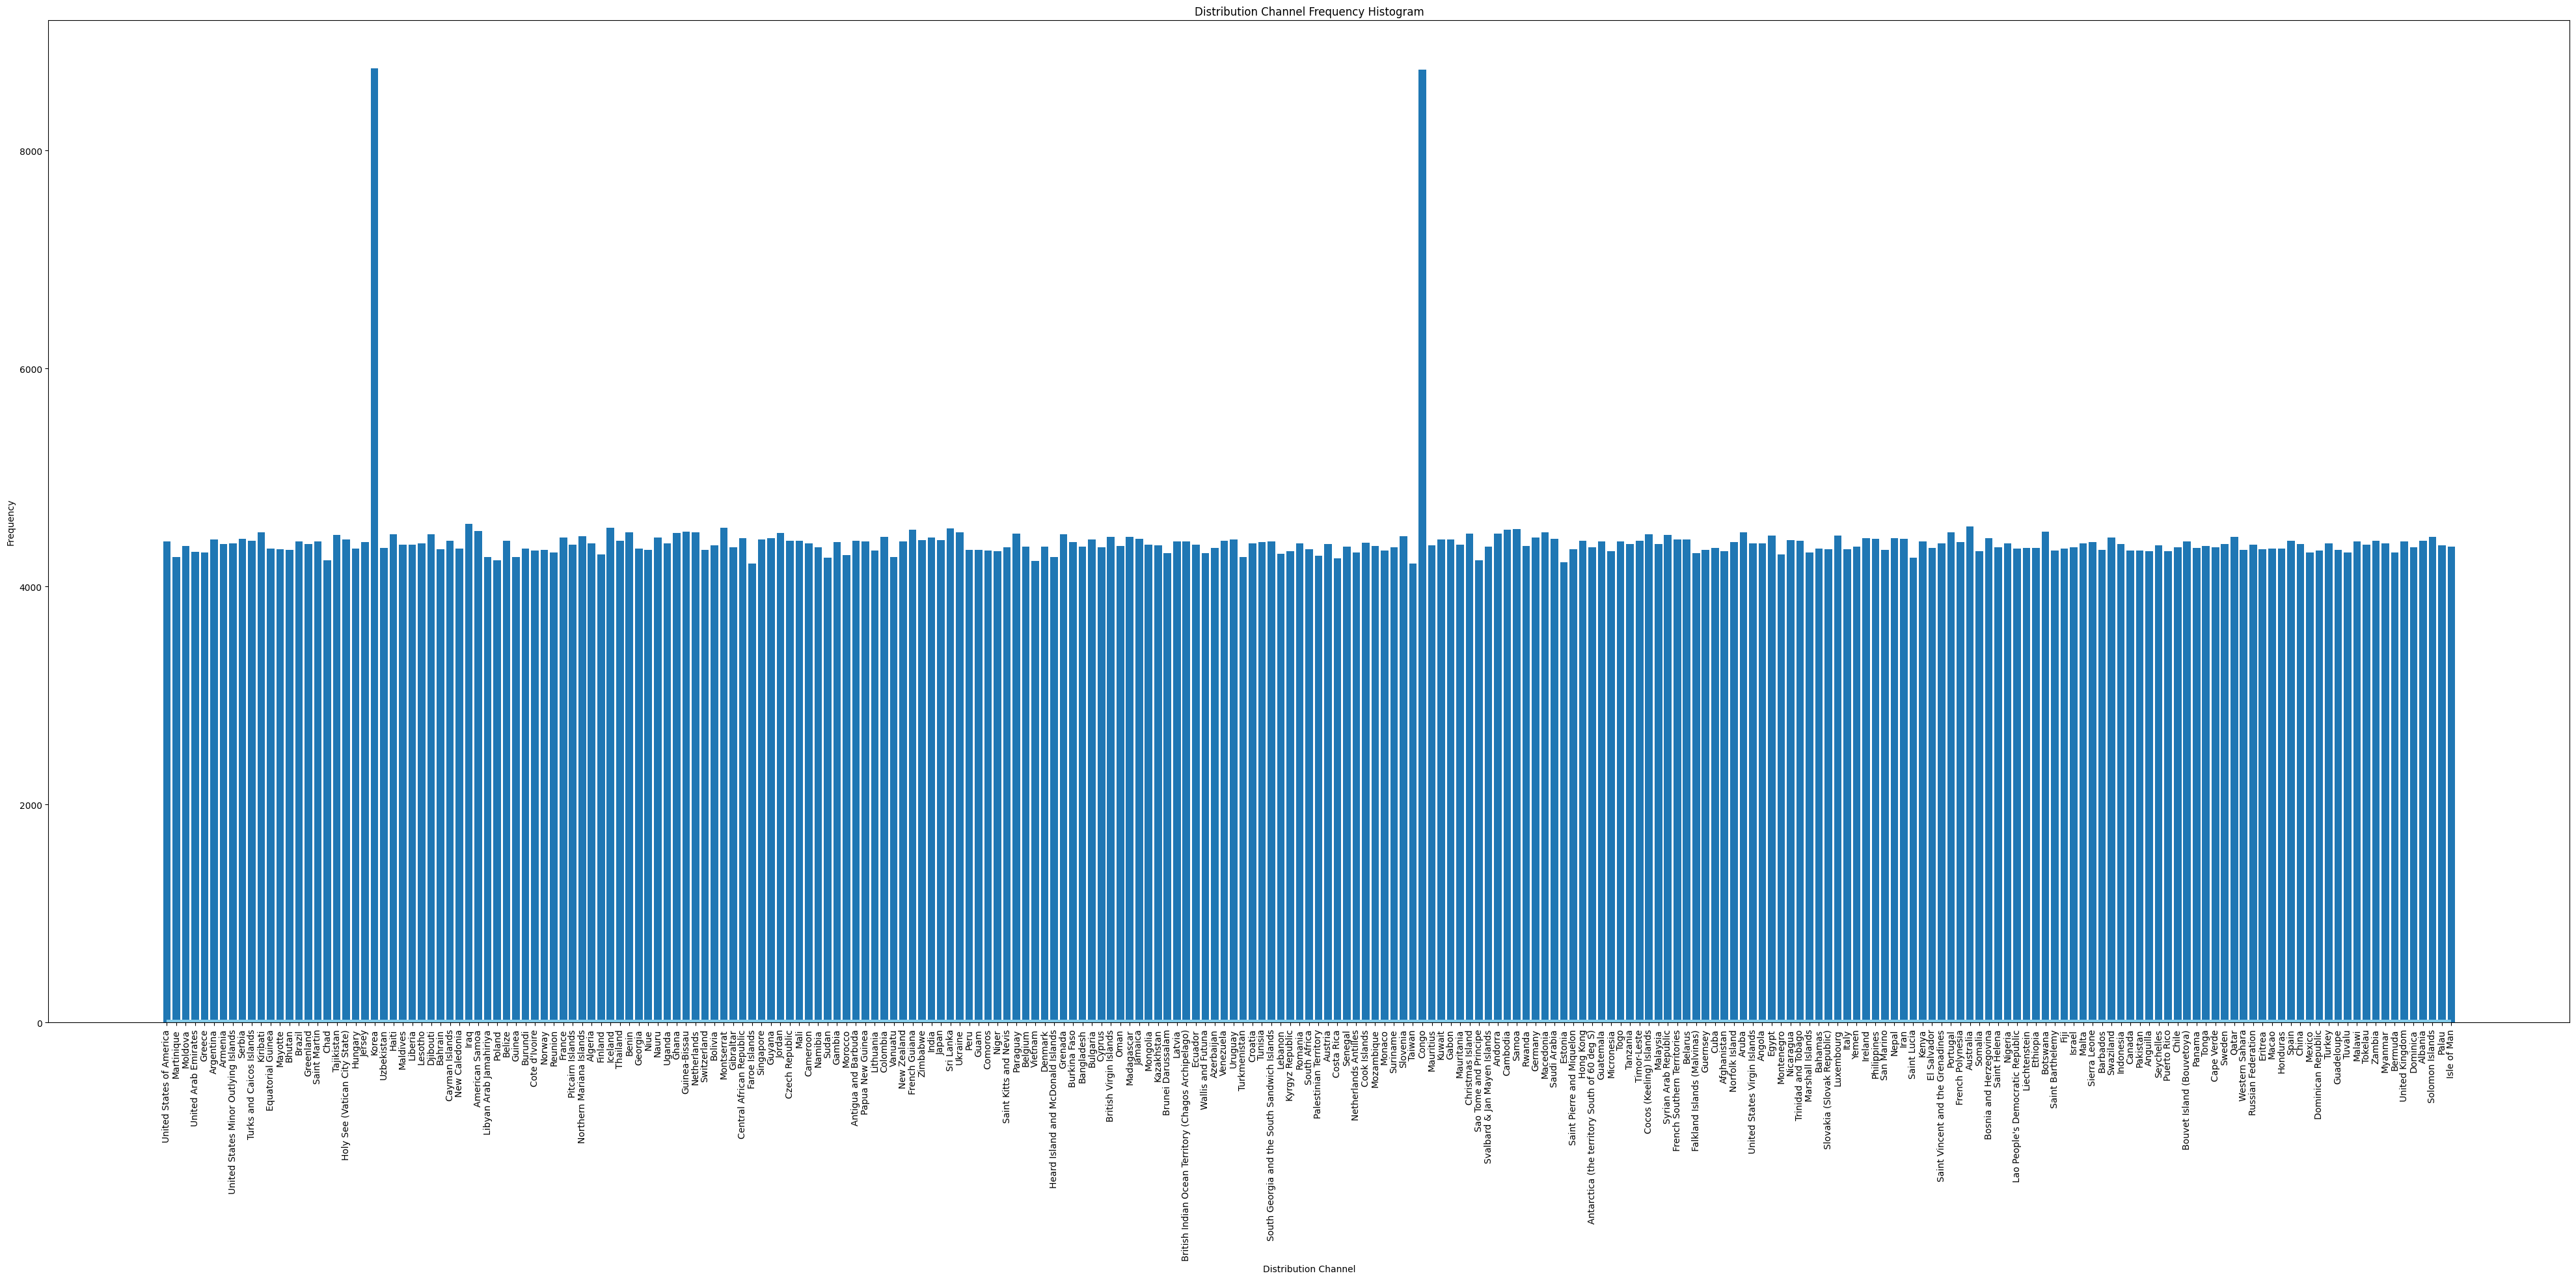

In [47]:
plt.figure(figsize=(50, 20))
# Plot the histogram
plt.bar(df_combined['DISTRIBUTION_CHANNEL'], df_combined['Frequency'])
plt.hist(df_combined['DISTRIBUTION_CHANNEL'], color='skyblue', lw=0)
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
plt.title('Distribution Channel Frequency Histogram')
plt.xticks(rotation=90)
plt.show()

In [48]:
df.describe


<bound method NDFrame.describe of          CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Regi

#### 2. Create a Pie Chart on ORDER_CURRENCY

In [49]:
boxes_curr={'ORDER_CURRENCY':df['ORDER_CURRENCY']}
df_count_curr = pd.DataFrame(boxes_curr, columns= ['ORDER_CURRENCY'])
df_count_curr['Frequency'] = df_count_curr['ORDER_CURRENCY'].map(df_count_curr['ORDER_CURRENCY'].value_counts())

count_curr = df_count_curr.pivot_table(index=['ORDER_CURRENCY'], aggfunc='size')
print (count_curr)

ORDER_CURRENCY
AED      7852
AUD     64200
BHD        32
CAD     55065
CHF      5259
CZK      2178
EUR    253196
GBP     22028
HKD      6198
HUI      1377
KWD         7
MYR     13946
NZD        79
PLN     11861
QAR        12
RON      4731
SAR        14
SEK         4
SGD      3909
USD    622835
dtype: int64


In [50]:
count_curr = df_count_curr.groupby('ORDER_CURRENCY').size().reset_index(name='Frequency_of_curr')
df_unique_curr = df[['ORDER_CURRENCY']].drop_duplicates()

df_combined_curr = pd.merge(df_unique_curr, count_curr, on='ORDER_CURRENCY')

print(df_combined_curr)


   ORDER_CURRENCY  Frequency_of_curr
0             EUR             253196
1             AED               7852
2             CHF               5259
3             CZK               2178
4             GBP              22028
5             RON               4731
6             USD             622835
7             PLN              11861
8             HUI               1377
9             SAR                 14
10            BHD                 32
11            KWD                  7
12            QAR                 12
13            SEK                  4
14            CAD              55065
15            HKD               6198
16            AUD              64200
17            MYR              13946
18            SGD               3909
19            NZD                 79


In [51]:
total_value = df_combined_curr['Frequency_of_curr'].sum()

In [52]:
df_combined_curr['percentage'] = (df_combined_curr['Frequency_of_curr'] / total_value) * 100
df_combined_curr['percentage']

0     23.557872
1      0.730566
2      0.489308
3      0.202646
4      2.049530
5      0.440182
6     57.949837
7      1.103572
8      0.128119
9      0.001303
10     0.002977
11     0.000651
12     0.001117
13     0.000372
14     5.123360
15     0.576675
16     5.973299
17     1.297564
18     0.363701
19     0.007350
Name: percentage, dtype: float64

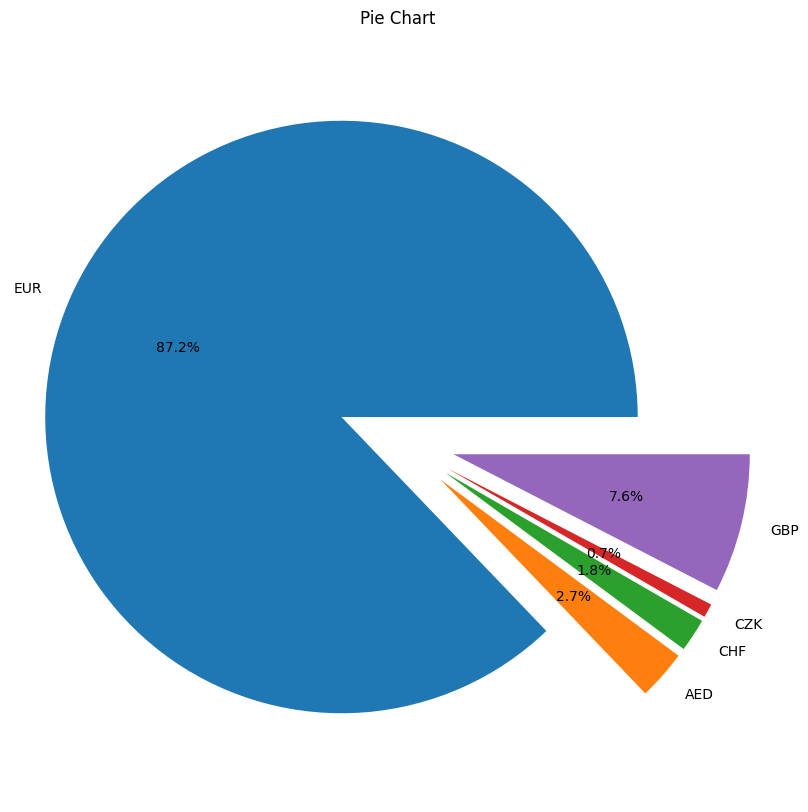

In [53]:
explode = [0.1 if (5 < val < 10) else 0.2 for val in df_combined_curr['percentage'][:5]]  # Explode if value > 20, else 0
plt.figure(figsize=(10, 10))
plt.pie(df_combined_curr['percentage'][:5], labels=df_combined_curr['ORDER_CURRENCY'][:5], autopct='%1.1f%%', explode=explode, textprops={'fontsize': 10})
#plt.pie(df_combined_curr['percentage'], labels=df_combined_curr['ORDER_CURRENCY'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart')
plt.xticks(rotation=90)  # Rotate the labels by 45 degrees
plt.show()

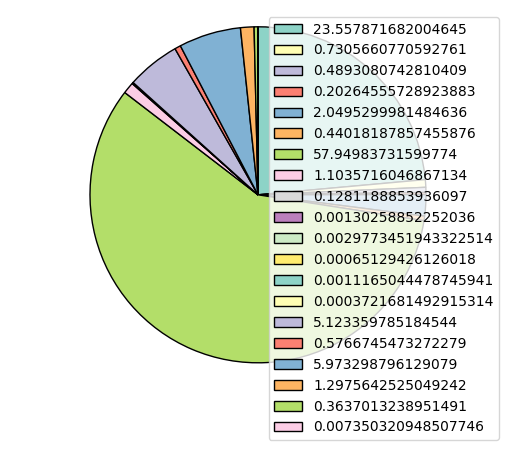

In [54]:
# Get the values from the 'value' column of the DataFrame
data = df_combined_curr['percentage'].tolist()
# Set the color palette for the pie chart
colors = plt.cm.Set3.colors

# Create the pie chart
plt.pie(data, colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'black'})

# Add labels to the pie chart sections
labels = df_combined_curr['percentage'].tolist()
plt.legend(labels, loc='best')

# Set the aspect ratio to ensure the pie appears as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

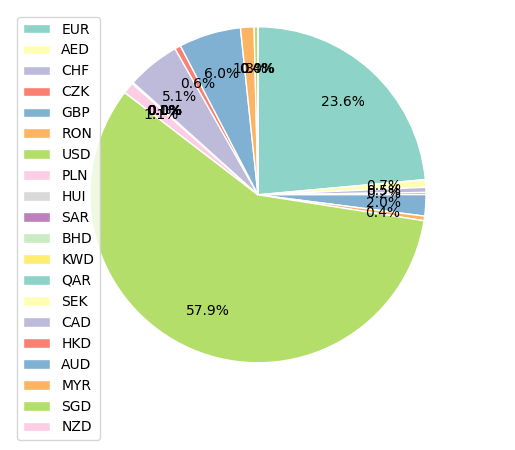

In [55]:
df_pie = df_combined_curr['percentage'].tolist()
colors = plt.cm.Set3.colors
plt.pie(df_pie, colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%',labeldistance=1.05, pctdistance=0.75)
labels=df_combined_curr['ORDER_CURRENCY'].tolist()
plt.legend(labels, loc='best')
plt.axis('equal')
plt.show()

#### 3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

In [56]:
boxes_pot={'PURCHASE_ORDER_TYPE':df['PURCHASE_ORDER_TYPE']}
df_count_pot = pd.DataFrame(boxes_pot, columns= ['PURCHASE_ORDER_TYPE'])
df_count_pot['Frequency_pot'] = df_count_pot['PURCHASE_ORDER_TYPE'].map(df_count_pot['PURCHASE_ORDER_TYPE'].value_counts())

count_pot = df_count_pot.pivot_table(index=['PURCHASE_ORDER_TYPE'], aggfunc='size')
print (count_pot)

PURCHASE_ORDER_TYPE
1000    13657
1002      111
1010       13
110      9777
120      6271
        ...  
X26Y        1
X26Z       85
X27A        2
XFXX        2
XXXX     7600
Length: 350, dtype: int64


In [57]:
df['PURCHASE_ORDER_TYPE'].describe

<bound method NDFrame.describe of 0          1000
1          1000
2          I200
3          N000
4          N000
           ... 
1101920     NaN
1101921     NaN
1101922     NaN
1101923     NaN
1101924     NaN
Name: PURCHASE_ORDER_TYPE, Length: 1074783, dtype: object>

In [58]:
count_pot = df_count_pot.groupby('PURCHASE_ORDER_TYPE').size().reset_index(name='Frequency_pot')
df_unique_pot = df[['PURCHASE_ORDER_TYPE']].drop_duplicates()
df_combined_pot = pd.merge(df_unique_pot, count_pot, on='PURCHASE_ORDER_TYPE')
print(df_combined_pot)

    PURCHASE_ORDER_TYPE  Frequency_pot
0                  1000          13657
1                  I200           4641
2                  N000          13461
3                  N250             90
4                  NAAA           4433
..                  ...            ...
345                X26W              4
346                X26Y              1
347                X26Z             85
348                X27A              2
349                XFXX              2

[350 rows x 2 columns]


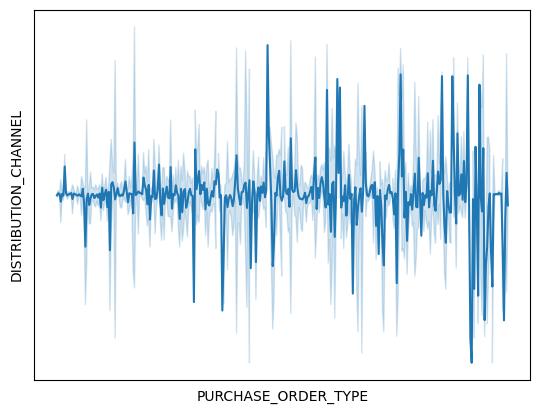

In [59]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.xticks([])
plt.yticks([])
plt.show()

#### 4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd

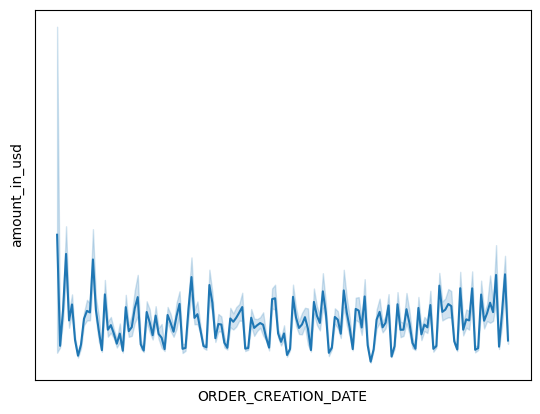

In [60]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['amount_in_usd'], data=df)
plt.xticks([])
plt.yticks([])
plt.show()

#### 5. Create a boxplot on ORDER_AMOUNT to find out the outliers

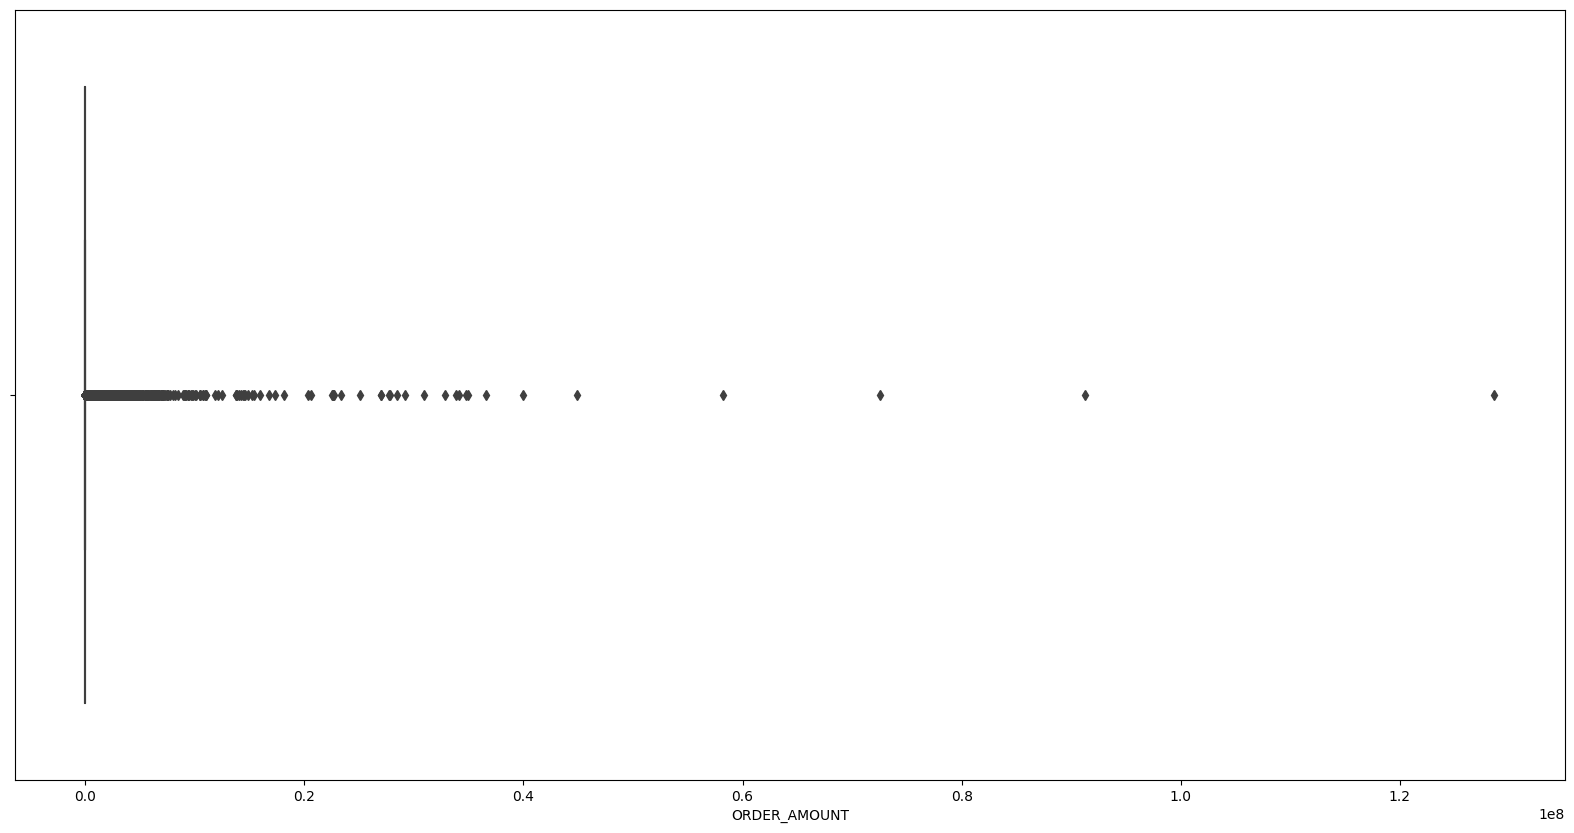

In [61]:
plt.figure(figsize=(20, 10))
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float)
sns.boxplot(x=df['ORDER_AMOUNT'], data=df)
plt.show()

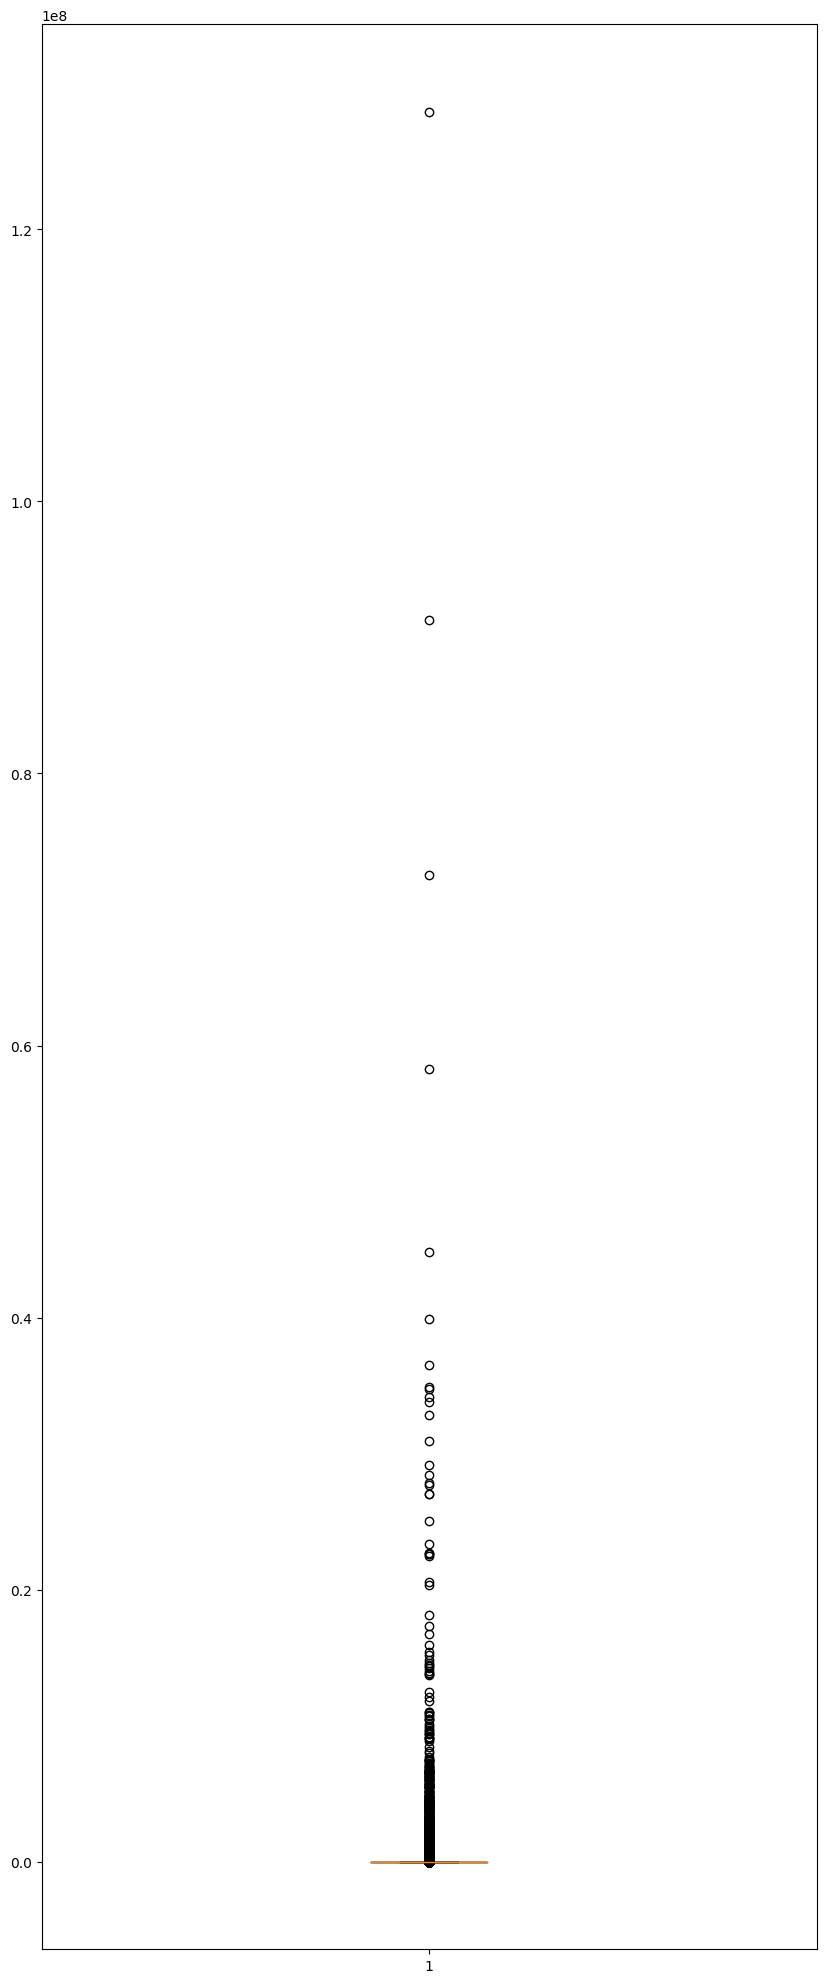

In [62]:
plt.figure(figsize=(10,25))
plt.boxplot(df['ORDER_AMOUNT'])
plt.show()

#### 6. Create a barchart on COMPANY_CODE and ORDER_AMOUNT

In [63]:
df = df.sort_values(by=['ORDER_AMOUNT'], ascending=False)
df


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
119897,980541538,4319,Benin,North-Region,163370045,9999,136,2022-02-28,160046,NR01,762300913,128637831.0,2022-05-06,HUI,93.0,1230009996,373049.7099,1230010132
141602,863699828,2481,Sudan,North-Region,133797667,9999,136,2022-03-09,144514,NR04,921484284,91276410.0,2022-05-06,HUI,93.0,1230009996,264701.5890,1230010132
4920,979579904,2589,Northern Mariana Islands,North-Region,92140146,9999,136,2022-01-05,154150,NR04,983998863,72551296.0,2022-05-06,HUI,93.0,1230009996,210398.7584,1230010132
213416,956803025,2472,Macao,North-Region,85342696,9999,136,2022-04-11,143150,NR03,837898646,58252858.0,2022-05-06,HUI,93.0,1230009996,168933.2882,1230010132
258676,922197823,2917,Greece,North-Region,56762823,9999,136,2022-05-04,145420,SR01,755257919,44854887.0,2022-05-10,HUI,93.0,1230009996,130079.1723,1230010132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668362,986583295,4127,Falkland Islands (Malvinas),South-Region,"0,00",X001,3670,2022-03-16,230100,NR04,866795360,0.0,2022-04-01,USD,NaN,1230014212,0.0000,1230017882
668361,753934778,3712,Korea,South-Region,"0,00",X001,3670,2022-03-16,230103,NR01,946139033,0.0,2022-04-04,USD,NaN,1230014212,0.0000,1230017882
668360,779331014,3754,Aruba,South-Region,"0,00",X001,3670,2022-03-16,230103,SR03,770351313,0.0,2022-04-01,USD,NaN,1230014212,0.0000,1230017882
668359,940069508,3168,Belgium,South-Region,"0,00",X001,3670,2022-03-16,230100,SR02,904247664,0.0,2022-04-01,USD,NaN,1230014212,0.0000,1230017882


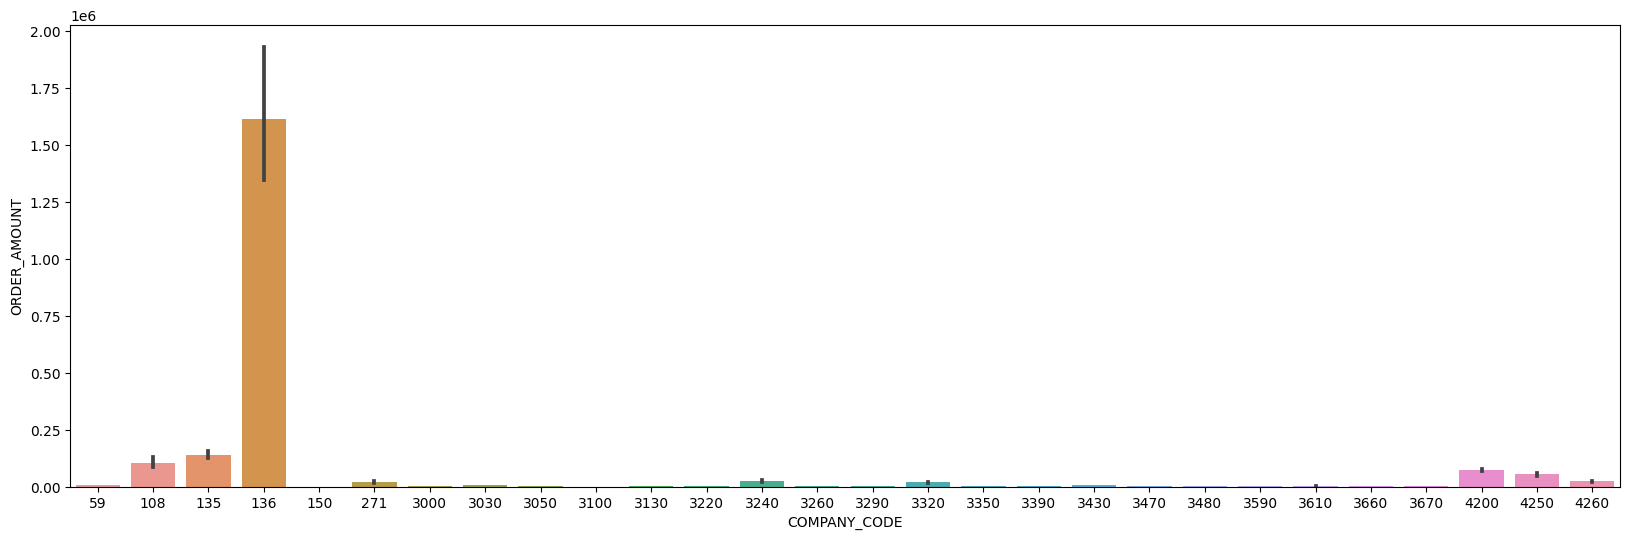

In [64]:
plt.figure(figsize=(20, 6))
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float)
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)
plt.show()

In [65]:
# export to csv
df.to_csv('dataFinal.csv', index=False)

In [66]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
df_2=pd.read_csv('dataFinal.csv')

#### 1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

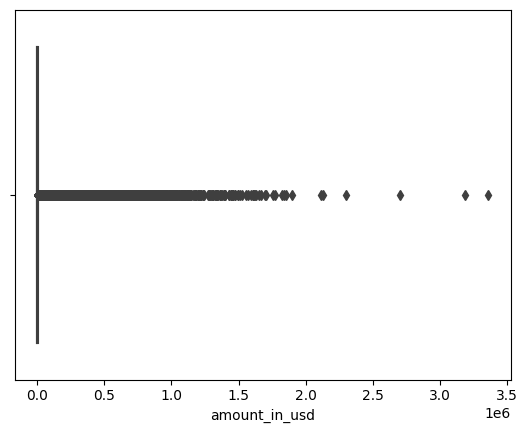

In [68]:
sns.boxplot(x=df_2['amount_in_usd'])
median = df_2['amount_in_usd'].median()
df_2['amount_in_usd'] = df_2['amount_in_usd'].mask(df_2['amount_in_usd'] > 2000000, median)

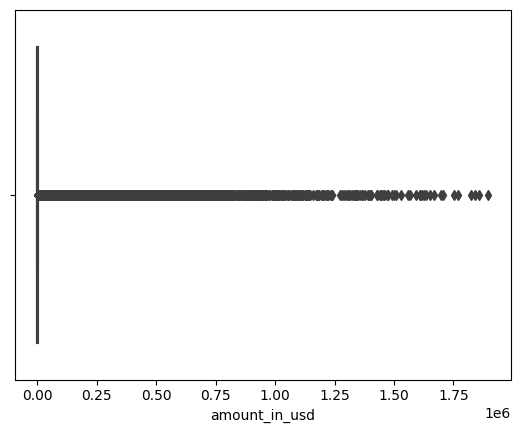

In [69]:
sns.boxplot(x=df_2['amount_in_usd'])
plt.show()

#### 2. Label encoding or One hot Encoding on all the categorical columns 


In [70]:
df_2.select_dtypes(include=['object']).columns.tolist()

['DISTRIBUTION_CHANNEL',
 'DIVISION',
 'RELEASED_CREDIT_VALUE',
 'PURCHASE_ORDER_TYPE',
 'ORDER_CREATION_DATE',
 'CREDIT_CONTROL_AREA',
 'REQUESTED_DELIVERY_DATE',
 'ORDER_CURRENCY']

In [71]:
df_ctg = df_2[['DISTRIBUTION_CHANNEL', 'DIVISION','RELEASED_CREDIT_VALUE','PURCHASE_ORDER_TYPE','CREDIT_CONTROL_AREA','ORDER_CURRENCY']]
df_ctg

,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,CREDIT_CONTROL_AREA,ORDER_CURRENCY
0,Benin,North-Region,163370045,9999,NR01,HUI
1,Sudan,North-Region,133797667,9999,NR04,HUI
2,Northern Mariana Islands,North-Region,92140146,9999,NR04,HUI
3,Macao,North-Region,85342696,9999,NR03,HUI
4,Greece,North-Region,56762823,9999,SR01,HUI
...,...,...,...,...,...,...
1074778,Falkland Islands (Malvinas),South-Region,"0,00",X001,NR04,USD
1074779,Korea,South-Region,"0,00",X001,NR01,USD
1074780,Aruba,South-Region,"0,00",X001,SR03,USD
1074781,Belgium,South-Region,"0,00",X001,SR02,USD


In [72]:
df_ctg['RELEASED_CREDIT_VALUE'].describe

<bound method NDFrame.describe of 0          163370045
1          133797667
2           92140146
3           85342696
4           56762823
             ...    
1074778         0,00
1074779         0,00
1074780         0,00
1074781         0,00
1074782         0,00
Name: RELEASED_CREDIT_VALUE, Length: 1074783, dtype: object>

In [73]:
df_ctg['RELEASED_CREDIT_VALUE'].map(type) != object

0          True
1          True
2          True
3          True
4          True
           ... 
1074778    True
1074779    True
1074780    True
1074781    True
1074782    True
Name: RELEASED_CREDIT_VALUE, Length: 1074783, dtype: bool

In [74]:
unique_values = df_ctg['RELEASED_CREDIT_VALUE'].unique()
unique_values

array(['163370045', '133797667', '92140146', ..., '84,99', '82,41',
       '3400,00'], dtype=object)

In [75]:
value_counts = df_ctg['RELEASED_CREDIT_VALUE'].value_counts()
value_counts

0,00       1001174
0              897
178,20         442
320,40         421
160,20         393
            ...   
4351,92          1
5178,61          1
4351,50          1
6146,62          1
3400,00          1
Name: RELEASED_CREDIT_VALUE, Length: 47462, dtype: int64

In [76]:
categorical = []
continuous = []

for col in df_ctg.columns:
    if df_2[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)

In [77]:
le = LabelEncoder()
# oneHot = OneHotEncoder()

for col in categorical:
    df_2[col] = le.fit_transform(df[col])
    # df[col] = oneHot.fit_transform(df[col])

In [78]:
for col in continuous:
    df_2[col] = df_2[col].apply(lambda x: np.log(x))

In [79]:
grouped_df = df_2.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']

grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,2100,6928.266763,609429,141,406732.0000
1,2101,10827.783533,723167,129,142451.2721
2,2102,3486.798396,594668,116,190534.0500
3,2103,1607.322547,667986,124,81078.0623
4,2104,2516.417615,806552,137,178332.9436
...,...,...,...,...,...
2406,4506,4297.003586,613023,143,622931.3588
2407,4507,19337.352752,620833,122,92414.7696
2408,4508,19293.834027,775251,139,398561.1110
2409,4509,4192.679398,487248,146,401812.2745


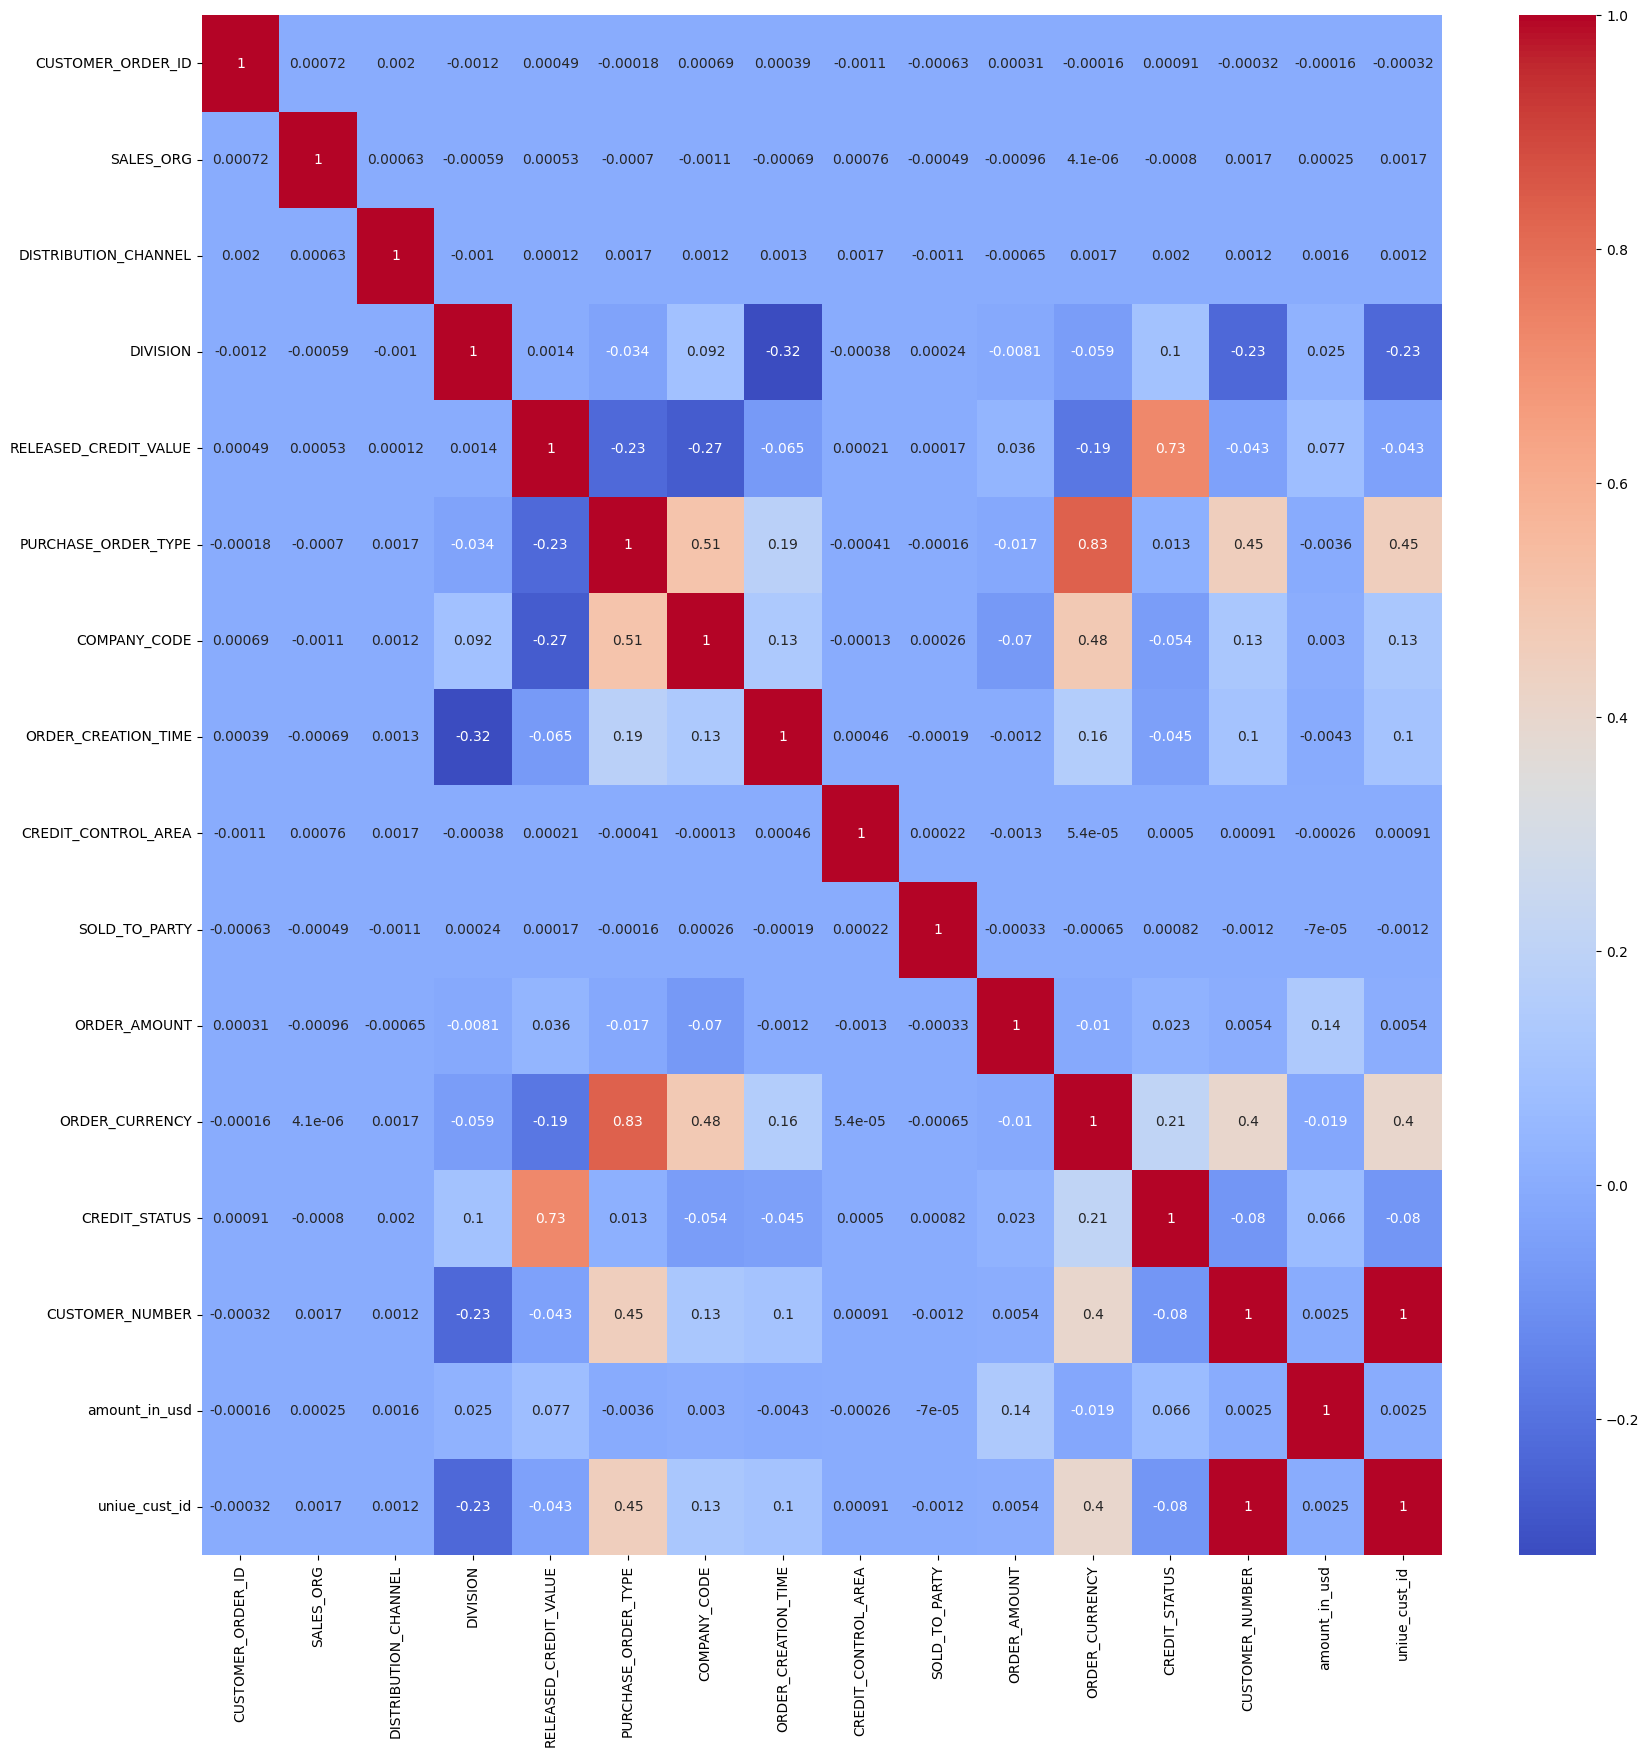

In [80]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm')
plt.show()

In [81]:
corr_matrix = df_2.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('CUSTOMER_NUMBER', 'uniue_cust_id')]


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#### 1. Modify the dataset to pass into any type of machine learning models.

In [83]:
df_2.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,980541538,4319,22,0,9938,104,136,2022-02-28,160046,0,762300913,128637831.0,2022-05-06,9,93.0,1230009996,373049.7099,1230010132
1,863699828,2481,205,0,5925,104,136,2022-03-09,144514,3,921484284,91276410.0,2022-05-06,9,93.0,1230009996,264701.5890,1230010132
2,979579904,2589,161,0,45824,104,136,2022-01-05,154150,3,983998863,72551296.0,2022-05-06,9,93.0,1230009996,210398.7584,1230010132
3,956803025,2472,126,0,44253,104,136,2022-04-11,143150,2,837898646,58252858.0,2022-05-06,9,93.0,1230009996,168933.2882,1230010132
4,922197823,2917,82,0,35833,104,136,2022-05-04,145420,4,755257919,44854887.0,2022-05-10,9,93.0,1230009996,130079.1723,1230010132


In [84]:
cat_cols = [col for col in df_2.columns if df_2[col].dtype == 'object']
num_cols = [col for col in df_2.columns if df_2[col].dtype != 'object']

In [85]:
le = LabelEncoder()
for col in cat_cols:
    df_2[col] = le.fit_transform(df_2[col])

In [86]:
df_2.rename(columns = {'ORDER_AMOUNT': 'target'}, inplace = True)

In [87]:
df_2.dropna(inplace = True)

X = df_2.drop(columns = ['target'])
y = df_2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

#### 2. Try different machine learning models

In [142]:
#Q2. Try different machine learning models like - 
        # Linear Regression
        # Support Vector Machine 
        # Decision Tree
        # Random Forest 
        # AdaBoost
        # Xgboost etc. 

## Linear Regression

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE:{mse}            r2_score:{r2}")

MSE:1.541011196091039            r2_score:0.4654978562543852


## Decision Tree

In [146]:
from sklearn.tree import DecisionTreeRegressor
# Creating and training the decision tree regressor model
#limiting the max depth of the tree to 15
model = DecisionTreeRegressor(max_depth=15)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE:{mse}            r2_score:{r2}")

MSE:0.785760609101155            r2_score:0.727457703681333


## Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Creating and training the Random Forest Regressor model
#limiting max depth to 15 and using n_jobs=-1 for parallel processing
model = RandomForestRegressor(n_estimators=40, max_depth=15, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_randomforest = r2_score(y_test, y_pred)
print(f"MSE:{mse}            r2_score:{r2_randomforest}")


MSE:0.7150659277526258            r2_score:0.7519782644845588


## AdaBoost

In [149]:
from sklearn.ensemble import AdaBoostRegressor

# Creating and training the AdaBoost Regressor model
model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_adaboost = r2_score(y_test, y_pred)
print(f"MSE:{mse}            r2_score:{r2_adaboost}")

MSE:1.2393093033676044            r2_score:0.5701436296542421


## XGBoost

In [150]:
import xgboost as xgb

# Creating and training the XGBoost regressor model
#limiting max depth to 15 and using n_jobs=-1 for parallel processing
model = xgb.XGBRegressor(n_estimators=60, random_state=42,n_jobs=-1,max_depth=15)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f"MSE:{mse}            r2_score:{r2_xgb}")

MSE:0.6317392397116302            r2_score:0.7808802565674917


In [88]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

regressor_models.pop(33)
regressor_models.pop(46)

('SVR', SVR())

In [89]:
regressor_models

[('ARDRegression', ARDRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('BaggingRegressor', BaggingRegressor()),
 ('BayesianRidge', BayesianRidge()),
 ('CCA', CCA()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('DummyRegressor', DummyRegressor()),
 ('ElasticNet', ElasticNet()),
 ('ElasticNetCV', ElasticNetCV()),
 ('ExtraTreeRegressor', ExtraTreeRegressor()),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('GammaRegressor', GammaRegressor()),
 ('GaussianProcessRegressor', GaussianProcessRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
 ('HuberRegressor', HuberRegressor()),
 ('IsotonicRegression', IsotonicRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('Lars', Lars()),
 ('LarsCV', LarsCV()),
 ('Lasso', Lasso()),
 ('LassoCV', LassoCV()),
 ('LassoLars', LassoLars()),
 ('LassoLarsCV', LassoLarsCV()),
 ('LassoLarsIC', Lass

In [90]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return model.__class__.__name__, model, mse, rmse, r2

In [91]:
df_compare = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
best_model = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

In [92]:
for model in regressor_models:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass

#### 3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [93]:
df_compare

,Regressor,Model,MSE,RMSE,R2
0,ARDRegression(),ARDRegression,1.776944e+11,4.215381e+05,3.118072e-02
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,4.159216e+11,6.449199e+05,-1.267674e+00
0,(DecisionTreeRegressor(random_state=266670309)...,BaggingRegressor,1.291215e+10,1.136317e+05,9.296008e-01
0,BayesianRidge(),BayesianRidge,1.777286e+11,4.215787e+05,3.099377e-02
0,DecisionTreeRegressor(),DecisionTreeRegressor,3.640746e+09,6.033859e+04,9.801500e-01
0,DummyRegressor(),DummyRegressor,1.834160e+11,4.282709e+05,-1.454082e-05
0,ElasticNet(),ElasticNet,1.777111e+11,4.215580e+05,3.108932e-02
0,ElasticNetCV(),ElasticNetCV,1.833651e+11,4.282115e+05,2.627868e-04
0,ExtraTreeRegressor(),ExtraTreeRegressor,8.178435e+09,9.043470e+04,9.554098e-01
0,"(ExtraTreeRegressor(random_state=2033276030), ...",ExtraTreesRegressor,6.853587e+08,2.617936e+04,9.962633e-01


In [94]:
df_compare = df_compare.sort_values(by = ['MSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=2033276030), ...",ExtraTreesRegressor,6.853587e+08,26179.356638,0.996263
0,DecisionTreeRegressor(),DecisionTreeRegressor,3.640746e+09,60338.590725,0.980150
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,4.334432e+09,65836.402036,0.976368
0,ExtraTreeRegressor(),ExtraTreeRegressor,8.178435e+09,90434.698648,0.955410
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,1.205649e+10,109802.066565,0.934266


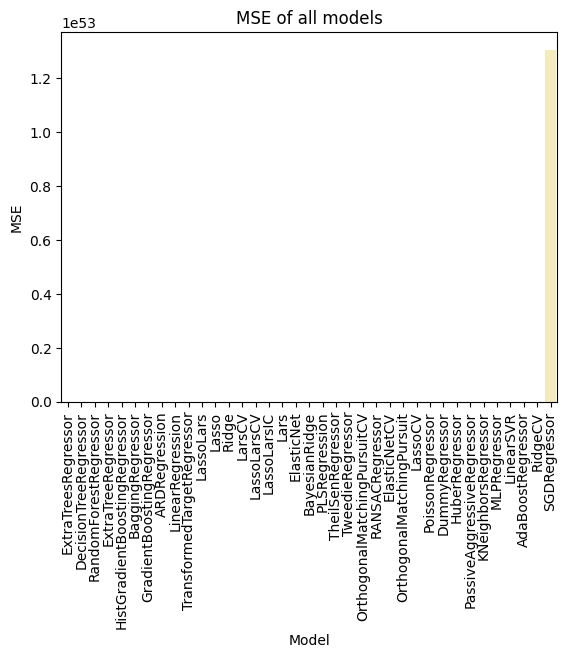

In [95]:
sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

#### 4. Compare the accuracies of all the models 

In [96]:
df_compare = df_compare.sort_values(by = ['RMSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=2033276030), ...",ExtraTreesRegressor,6.853587e+08,26179.356638,0.996263
0,DecisionTreeRegressor(),DecisionTreeRegressor,3.640746e+09,60338.590725,0.980150
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,4.334432e+09,65836.402036,0.976368
0,ExtraTreeRegressor(),ExtraTreeRegressor,8.178435e+09,90434.698648,0.955410
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,1.205649e+10,109802.066565,0.934266


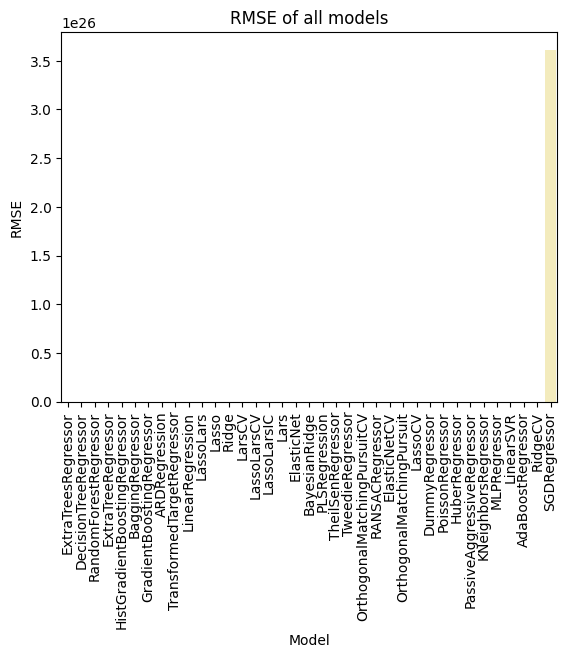

In [97]:
sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

#### 5. Select the best possible model

In [98]:
df_compare = df_compare[df_compare['R2'] > 0]
df_compare = df_compare.sort_values(by = ['R2'], ascending = False)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=2033276030), ...",ExtraTreesRegressor,6.853587e+08,26179.356638,0.996263
0,DecisionTreeRegressor(),DecisionTreeRegressor,3.640746e+09,60338.590725,0.980150
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,4.334432e+09,65836.402036,0.976368
0,ExtraTreeRegressor(),ExtraTreeRegressor,8.178435e+09,90434.698648,0.955410
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,1.205649e+10,109802.066565,0.934266


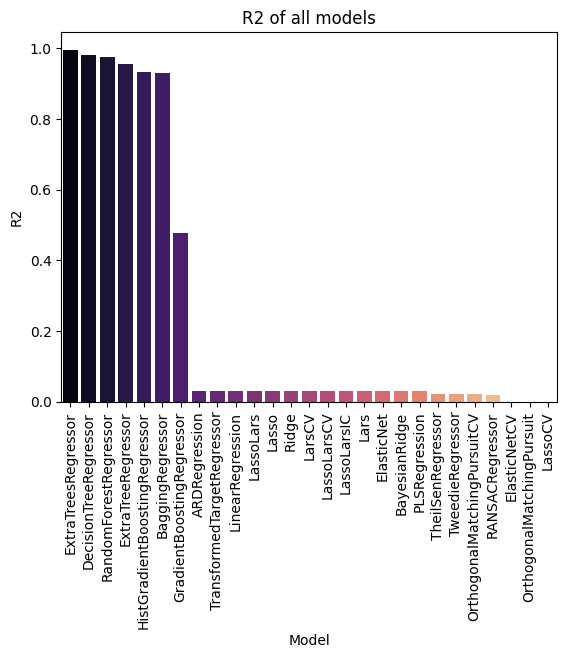

In [99]:
sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

In [100]:
best_model = best_model.drop_duplicates()
best_model

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=2033276030), ...",ExtraTreesRegressor,6.853587e+08,26179.356638,0.996263
0,DecisionTreeRegressor(),DecisionTreeRegressor,3.640746e+09,60338.590725,0.980150
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,4.334432e+09,65836.402036,0.976368
0,ExtraTreeRegressor(),ExtraTreeRegressor,8.178435e+09,90434.698648,0.955410
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,1.205649e+10,109802.066565,0.934266


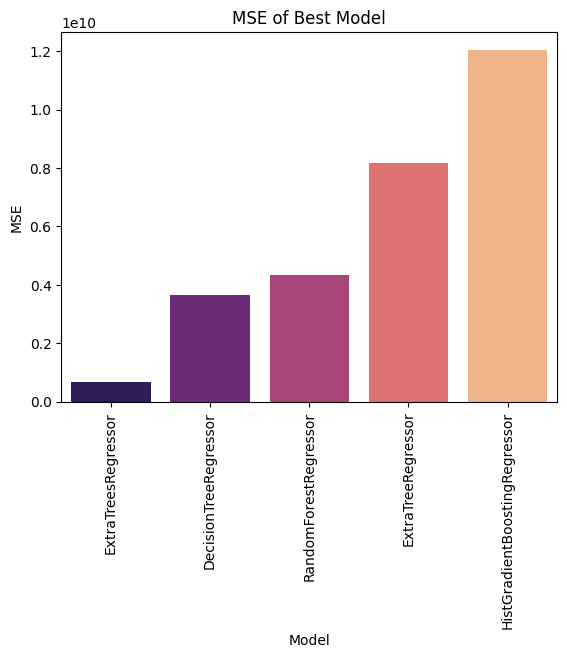

In [101]:
sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

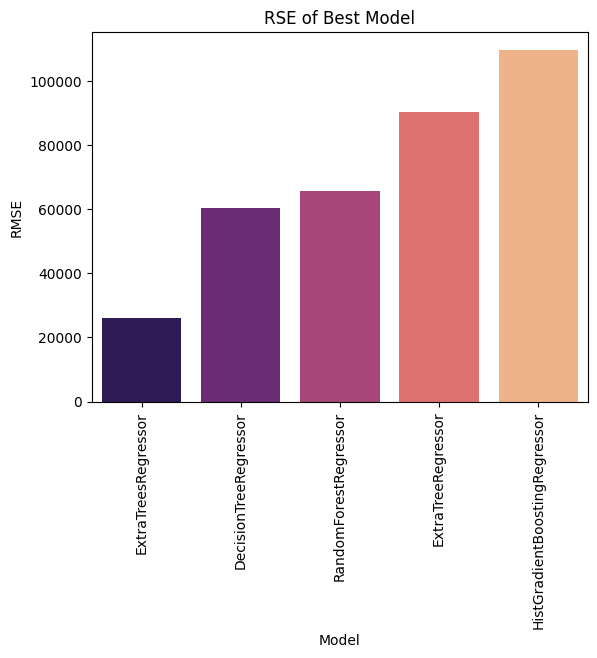

In [102]:
sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

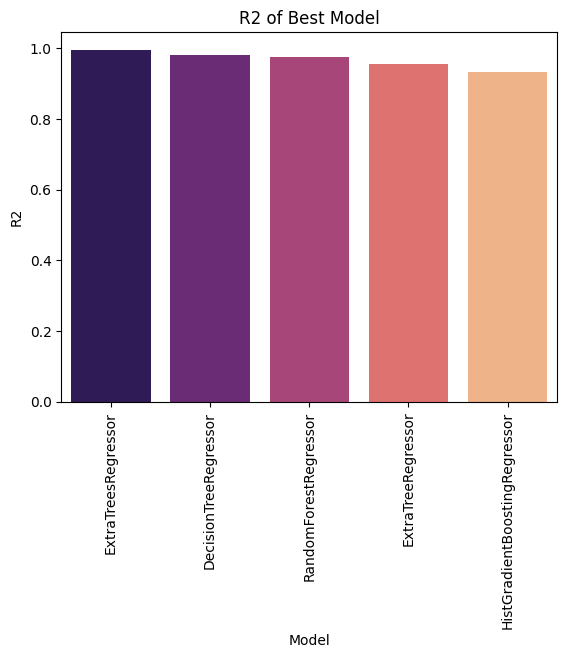

In [103]:
sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [104]:
bestModel = set()

best_model = best_model.sort_values(by = ['MSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['RMSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['R2'], ascending = False)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

#### 6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


In [105]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    return grid_search.best_estimator_, mse, rmse, r2

#### 7. Come up with the best possible model accuracy.

In [106]:
for model in bestModel:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)            
    except:
        print('Error')

DecisionTreeRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Error
RandomForestRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 100}
0.935287473090526
RandomForestRegressor()
MSE:  3289680490.547348
RMSE:  57355.73633515089
R2:  0.9820641124851941
ExtraTreesRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 500}
0.950152809845069
ExtraTreesRegressor(n_estimators=500)
MSE:  495502201.47070855
RMSE:  22259.87873890396
R2:  0.9972984392330945


In [107]:
import pickle

In [108]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [111]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)